In [1]:
import torch, math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (ativa 3D)

torch.set_default_dtype(torch.float64)

def to_np(t):
    return t.detach().cpu().numpy()

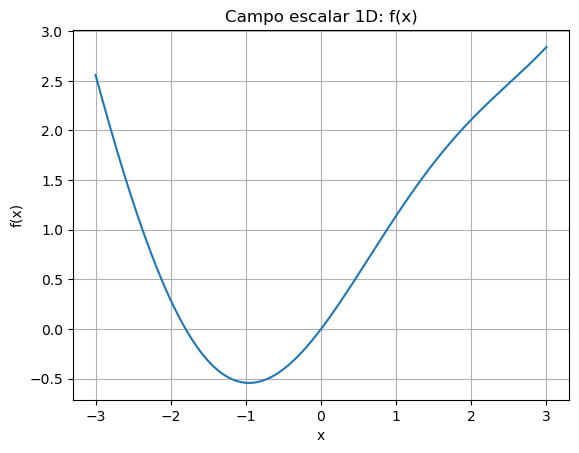

In [2]:
# f(x) = sin(x) + 0.3 x^2
x = torch.linspace(-3, 3, 400)
f = torch.sin(x) + 0.3 * x**2

plt.figure()
plt.plot(to_np(x), to_np(f))
plt.title('Campo escalar 1D: f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

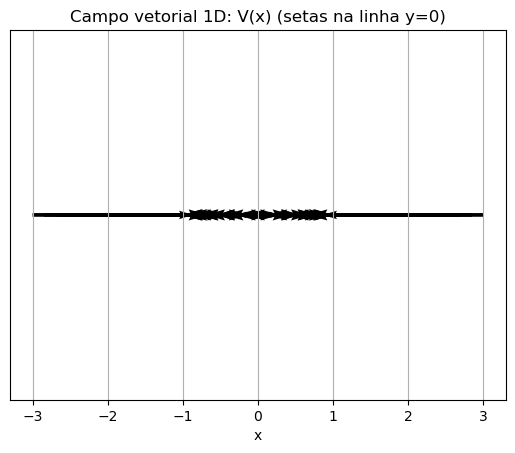

In [4]:
# V(x) = -x + sin(2x)
x = torch.linspace(-3, 3, 41)
Vx = -x + torch.sin(2*x)

y0 = torch.zeros_like(x)
u = Vx  # componente x do vetor
v = torch.zeros_like(x)  # sem componente y (apenas ao longo da reta)

plt.figure()
plt.quiver(to_np(x), to_np(y0), to_np(u), to_np(v), angles='xy', scale_units='xy', scale=1)
plt.title('Campo vetorial 1D: V(x) (setas na linha y=0)')
plt.xlabel('x')
plt.yticks([])
plt.ylim(-1, 1)
plt.grid(True)
plt.show()

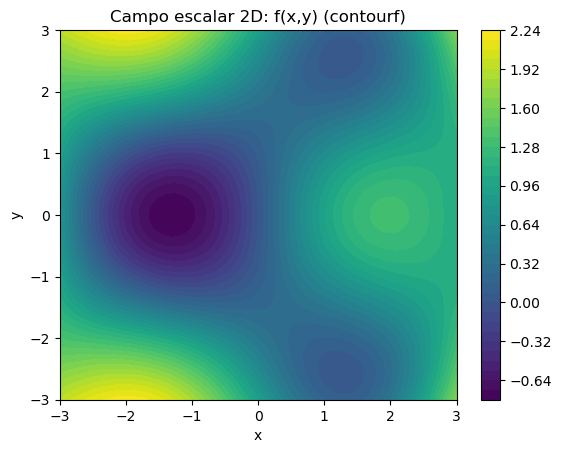

In [5]:
# f(x,y) = sin(x) cos(y) + 0.1 (x^2 + y^2)
xs = torch.linspace(-3, 3, 200)
ys = torch.linspace(-3, 3, 200)
X, Y = torch.meshgrid(xs, ys, indexing='xy')
Z = torch.sin(X)*torch.cos(Y) + 0.1*(X**2 + Y**2)

plt.figure()
cs = plt.contourf(to_np(X), to_np(Y), to_np(Z), levels=40)
plt.title('Campo escalar 2D: f(x,y) (contourf)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(cs)
plt.show()


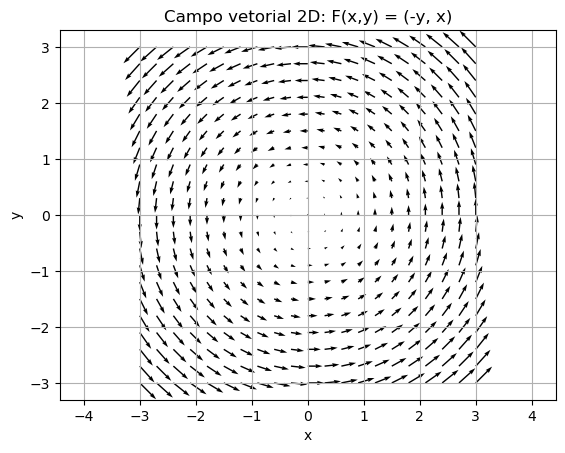

In [6]:
# F(x,y) = (-y, x) — rotação ao redor da origem
xs = torch.linspace(-3, 3, 21)
ys = torch.linspace(-3, 3, 21)
X, Y = torch.meshgrid(xs, ys, indexing='xy')
U = -Y
V = X

plt.figure()
plt.quiver(to_np(X), to_np(Y), to_np(U), to_np(V))
plt.title('Campo vetorial 2D: F(x,y) = (-y, x)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()

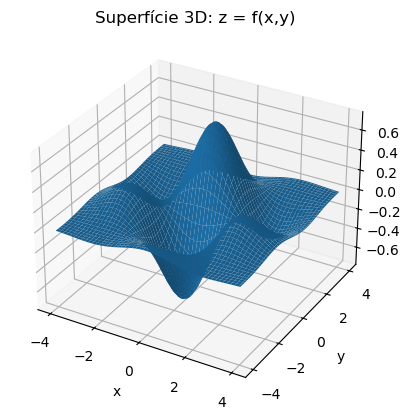

In [7]:
# z = f(x,y) = e^{-0.15(x^2+y^2)} cos(x) sin(y)
xs = torch.linspace(-4, 4, 100)
ys = torch.linspace(-4, 4, 100)
X, Y = torch.meshgrid(xs, ys, indexing='xy')
Z = torch.exp(-0.15*(X**2 + Y**2)) * torch.cos(X) * torch.sin(Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(to_np(X), to_np(Y), to_np(Z), linewidth=0, antialiased=True)
ax.set_title('Superfície 3D: z = f(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

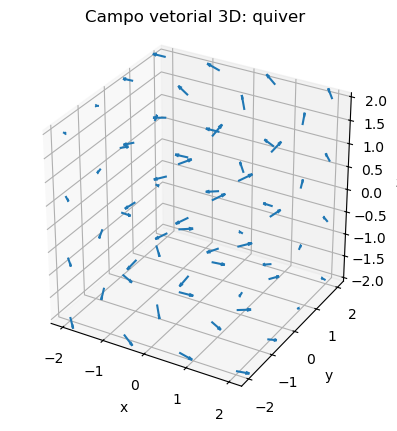

In [8]:
# F(x,y,z) = (-y, x, 0.5 z)
xs = torch.linspace(-2, 2, 7)
ys = torch.linspace(-2, 2, 7)
zs = torch.linspace(-2, 2, 7)
X, Y, Z = torch.meshgrid(xs, ys, zs, indexing='ij')
U = -Y
V = X
W = 0.5*Z

# Para não poluir, amostramos menos pontos (saltando de 2 em 2)
step = (slice(None,None,2), slice(None,None,2), slice(None,None,2))
Xn, Yn, Zn = X[step], Y[step], Z[step]
Un, Vn, Wn = U[step], V[step], W[step]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(to_np(Xn), to_np(Yn), to_np(Zn), to_np(Un), to_np(Vn), to_np(Wn), length=0.3, normalize=True)
ax.set_title('Campo vetorial 3D: quiver')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_box_aspect((1,1,1))
plt.show()

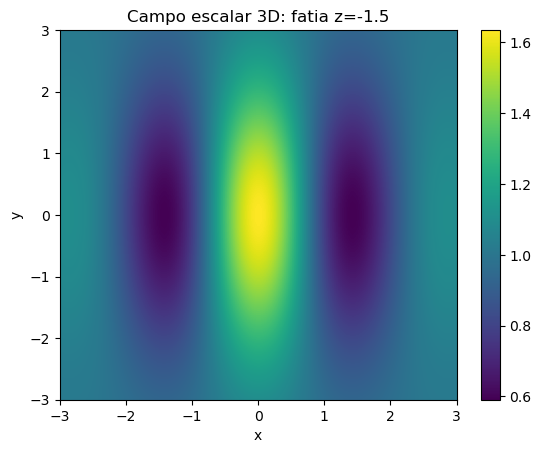

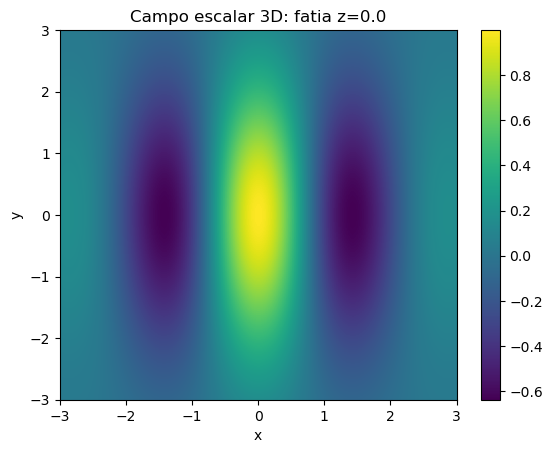

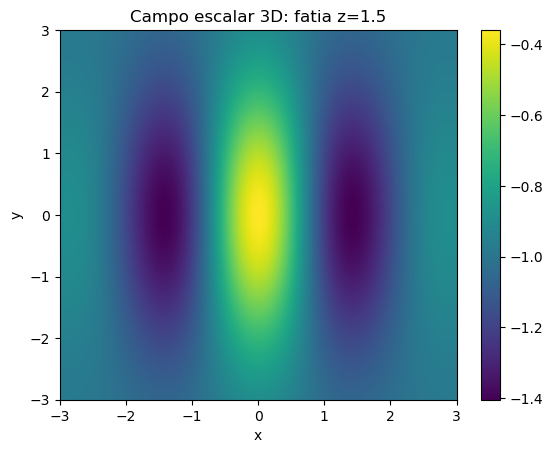

In [9]:
# f(x,y,z) = exp(-0.2(x^2+y^2+z^2)) * cos(2x) - sin(z)
xs = torch.linspace(-3, 3, 200)
ys = torch.linspace(-3, 3, 200)
X, Y = torch.meshgrid(xs, ys, indexing='xy')
def f3(x, y, z):
    return torch.exp(-0.2*(x**2+y**2+z**2))*torch.cos(2*x) - torch.sin(z)

for z0 in [-1.5, 0.0, 1.5]:
    Zslice = f3(X, Y, torch.tensor(z0))
    plt.figure()
    im = plt.imshow(to_np(Zslice), origin='lower', extent=[xs.min(), xs.max(), ys.min(), ys.max()], aspect='auto')
    plt.title(f'Campo escalar 3D: fatia z={z0}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(im)
    plt.show()
